K-means Clustering


In [1]:
# k-meas_project1
# 使用存檔於myfeature資料夾下的特徵矩陣
# Author: Yuan-Jen Chang, Feng Chia University, imCLOUD CO.,LTD.
# Date: Sep. 18 2024

# Importing the libraries
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Define directories
currentDirectory = '/content/drive/MyDrive/PHM_2024_Group6' # root Directory
healthyDataDirectory='/content/drive/MyDrive/PHM_2024_Group6/Data/Training/Healthy'
faulty1DataDirectory='/content/drive/MyDrive/PHM_2024_Group6/Data/Training/Faulty1'
faulty2DataDirectory='/content/drive/MyDrive/PHM_2024_Group6/Data/Training/Faulty2'
testingDataDirectory='/content/drive/MyDrive/PHM_2024_Group6/Data/Testing'
csvDirectory='/content/drive/MyDrive/PHM_2024_Group6/csv'
featureDirectory='/content/drive/MyDrive/PHM_2024_Group6/myfeature'

In [4]:
# 讀取檔案
os.chdir(featureDirectory) # Change directory to feature file directory
dataset = pd.read_csv('training_allFeature.csv') # (140, 30)
dataset3 = pd.read_csv('featureTesting.csv') # (28, 30)

In [ ]:
dataset

,1-x-rms,2-x-mean,3-x-kurtosis,4-x-peak2peak,5-x-skewness,6-x-FFT1X,7-x-FFT2X,8-x-FFT3X,9-x-FFT4X,10-x-FFT5X,...,21-v-rms,22-v-mean,23-v-kurtosis,24-v-peak2peak,25-v-skewness,26-v-FFT1X,27-v-FFT2X,28-v-FFT3X,29-v-FFT4X,30-v-FFT5X
0,0.314746,0.001753,3.593421,3.527751,0.024025,0.020744,0.003269,0.003346,0.021163,0.041661,...,0.399403,-0.033697,7.546915,2.609022,0.544963,0.190316,0.240329,0.185104,0.088005,0.075707
1,0.317927,0.001764,3.674492,3.718498,0.044039,0.025043,0.006950,0.003027,0.031898,0.052875,...,0.405080,-0.033955,7.553846,2.637694,0.548363,0.241152,0.240852,0.124940,0.117129,0.051843
2,0.314445,0.001786,3.701843,3.756993,0.053096,0.025607,0.009335,0.005179,0.042194,0.100941,...,0.405348,-0.033435,7.578799,2.659993,0.535003,0.207876,0.184061,0.148667,0.105387,0.063369
3,0.314726,0.001964,3.627408,3.785499,0.029590,0.023140,0.008209,0.003744,0.046942,0.070402,...,0.402989,-0.032860,7.556753,2.631322,0.550625,0.299629,0.207863,0.163845,0.134186,0.063793
4,0.316797,0.001961,3.634398,3.907932,0.042196,0.023971,0.006547,0.003097,0.023084,0.057869,...,0.398951,-0.033336,7.514810,2.612209,0.541521,0.227685,0.229728,0.121157,0.098158,0.046747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0.349500,0.002310,3.053051,3.043448,0.357705,0.132406,0.001515,0.003429,0.004419,0.010292,...,0.377896,-0.059543,7.663218,2.468856,0.558449,0.257898,0.220270,0.147454,0.079787,0.048053
136,0.351655,0.002045,3.081705,2.899304,0.368739,0.119882,0.002008,0.004123,0.005197,0.011663,...,0.377940,-0.059421,7.670792,2.481598,0.561388,0.224105,0.128632,0.094354,0.053118,0.030272
137,0.349048,0.002533,3.088260,2.923496,0.371702,0.093804,0.001215,0.003949,0.004064,0.006838,...,0.376783,-0.060411,7.644217,2.465670,0.557454,0.244835,0.209539,0.143999,0.081241,0.042948
138,0.349670,0.001576,3.169170,3.155214,0.411162,0.080508,0.001391,0.003512,0.004111,0.006956,...,0.376179,-0.059378,7.639943,2.465670,0.557912,0.251332,0.203285,0.168710,0.105960,0.069082


In [5]:
# 讀取檔案
os.chdir(featureDirectory) # Change directory to feature file directory
dataset1 = pd.read_csv('featureHealthy.csv') # (48, 80)
dataset2 = pd.read_csv('featureFaulty.csv') # (96, 80)
#dataset2 = pd.read_csv('featureFaulty1.csv') # (48, 80)
#dataset2 = pd.read_csv('featureFaulty2.csv') # (48, 80)
dataset3 = pd.read_csv('featureTesting.csv')# (36, 80)
dataset4 = pd.read_csv('training_allFeature.csv')# (144, 80)

shape1=dataset1.shape
shape2=dataset2.shape
shape3=dataset3.shape
shape4=dataset4.shape

len1=shape1[1]  # Totally 80 features
m1=shape1[0] # m1 = 48 ; about Healthy
m2=shape2[0] # m2 = 96 ; about Faluty
m3=shape3[0] # m3 = 36 ; about Testing


feature_name=dataset1.columns.values.tolist() #取得特徵名稱

In [6]:
# m1 = 48
# m2 = 96
# len1 = 80
# 多故障分類之資料框順序: faulty1 -> faulty2 -> healthy

########## Get the healthy and faulty features from feature directory ##########

featureHealthy = dataset1.iloc[:, :].values  #Healthy features
featureFaulty = dataset2.iloc[:, :].values  #Faulty features
featureTesting = dataset3.iloc[:, :].values  #Faulty features

featureAll = np.zeros((m1+m2, len1), dtype=np.double) #(144, 80) # m1 = 48, m2 = 96
featureAll[0:m1,:]=featureHealthy[0:m1,:] #Healthy dataset = 48
featureAll[m1:m1+m2,:]=featureFaulty[0:96,:] #Faulty dataset = 96

# healthy label: 1
# faulty1 label: 2
# faulty2 label: 3

labelAll=np.zeros((m1+m2,1), dtype=np.double)  # 144 labels for training data

## Training data
labelAll[0:m1,0] =1  # Healthy label = 1; [0:48] assigned 1

labelAll[m1:m1+48,0] =2  # Faulty1 label  = 2 ; [48:96] assigned 2
labelAll[m1+48:m1+48*2,0] =3 # Faulty2 label  = 3; [96:144] assigned 3


X_train0 = featureAll[:,:] #Training set of X. The features: y-rms , v-mean
y_train = labelAll  #Training set of y. The labels

#  Test set
X_test0 = featureTesting[:,:] # The features:
y_test=np.zeros((m3,1), dtype=np.double) # m3 testing data
y_test[0:12,0] = 2  # Have known Faulty1 label = 2 (已知答案)
y_test[12:24,0] = 3  # Have known Faulty2 label = 3 (已知答案)
y_test[24:36,0] = 1  # Have known Healthy label = 1 (已知答案)


In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  # Standarderize all training data
X_train = sc.fit_transform(X_train0)
X_test = sc.transform(X_test0)

In [9]:
# Apply PCA dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 2,random_state=0)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

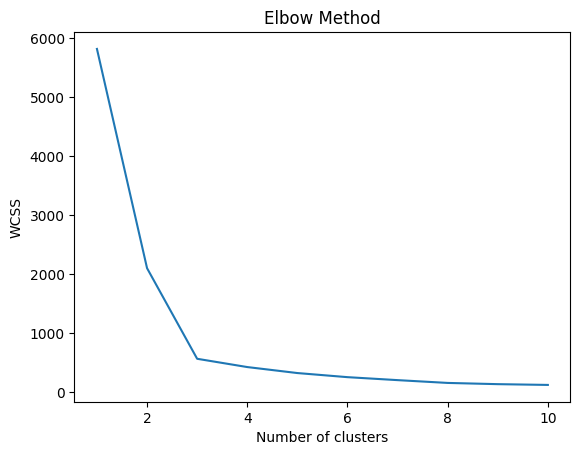

In [11]:
# Calculate WCSS
plt.figure()
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
#plt.plot(2,wcss[1],'ro-')
#plt.plot(7,wcss[6],'rs-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

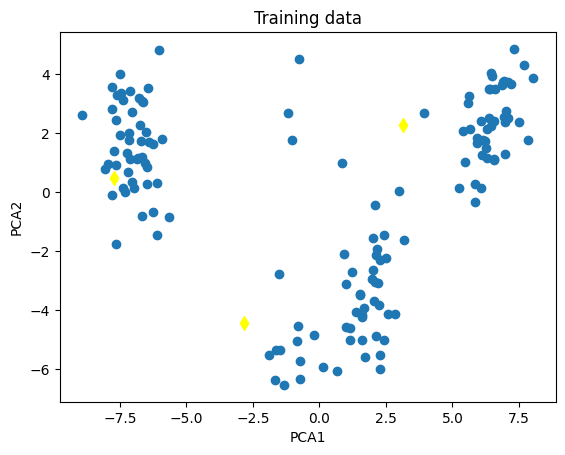

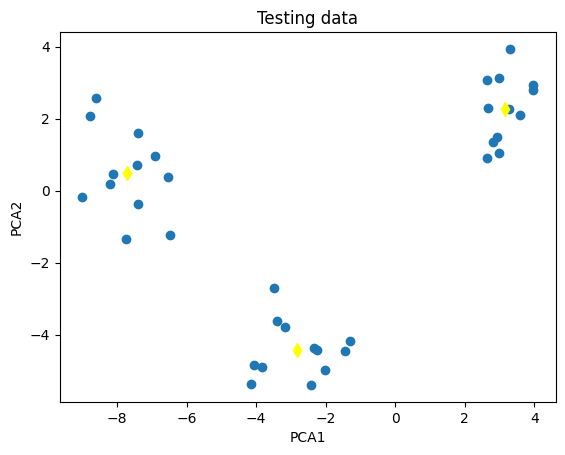

In [14]:
# K-Means
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_train)
pred_y_test = kmeans.fit_predict(X_test)
#Plot training data
plt.figure()
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='d', s=50, c='yellow')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Training data')
plt.show()
#Plot testing data
plt.figure()
plt.scatter(X_test[:,0], X_test[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='d', s=50, c='yellow')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Testing data')
plt.show()